In [1]:
import talos as ta

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\chances\plots.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  Fi

In [2]:
r = ta.Reporting('./hasil/1layer.csv')

In [3]:
# get the number of rounds in the Scan
r.rounds()

209

In [4]:
# get the highest result ('val_acc' by default)
r.high()

0.82350071

In [5]:
# get the highest result for any metric
r.high('acc')

0.9989759709999999

In [6]:
# get the round with the best result
r.rounds2high('val_acc')

151

In [7]:
# get the best paramaters
r.best_params('val_acc')

array([[256, 50, 0, 0.1, 80,
        '<keras.layers.advanced_activations.LeakyReLU object at 0x7f8572c2c3c8>',
        30, "<class 'keras.optimizers.Adam'>", 'normal', 0],
       [32, 50, 0, 0.01, 40, '<function relu at 0x00000153CA8B8C80>', 30,
        "<class 'keras.optimizers.Adam'>", 'he_uniform', 1],
       [64, 50, 0, 0.01, 100,
        '<keras.layers.advanced_activations.LeakyReLU object at 0x7f8572c2c3c8>',
        30, "<class 'keras.optimizers.Adam'>", 'he_uniform', 2],
       [64, 50, 0, 0.01, 100,
        '<keras.layers.advanced_activations.LeakyReLU object at 0x7f8572c2c3c8>',
        30, "<class 'keras.optimizers.Adam'>", 'glorot_normal', 3],
       [32, 50, 0, 0.01, 60,
        '<keras.layers.advanced_activations.LeakyReLU object at 0x7f8572c2c3c8>',
        30, "<class 'keras.optimizers.Adam'>", 'normal', 4],
       [64, 50, 0, 0.01, 80,
        '<keras.layers.advanced_activations.LeakyReLU object at 0x7f8572c2c3c8>',
        30, "<class 'keras.optimizers.Adam'>", 'lecun

In [8]:
# get correlation for hyperparameters against a metric
r.correlate('loss')

first_neuron    0.143927
batch_size     -0.063358
epochs               NaN
epochs2              NaN
dropout              NaN
lr              0.597618
Name: loss, dtype: float64

In [9]:
# get correlation for hyperparameters against a metric
r.correlate('acc')

first_neuron   -0.036144
batch_size     -0.035997
epochs               NaN
epochs2              NaN
dropout              NaN
lr             -0.441044
Name: acc, dtype: float64

In [10]:
# get correlation for hyperparameters against a metric
r.correlate('val_acc')

first_neuron    0.078608
batch_size     -0.054116
epochs               NaN
epochs2              NaN
dropout              NaN
lr             -0.219612
Name: val_acc, dtype: float64

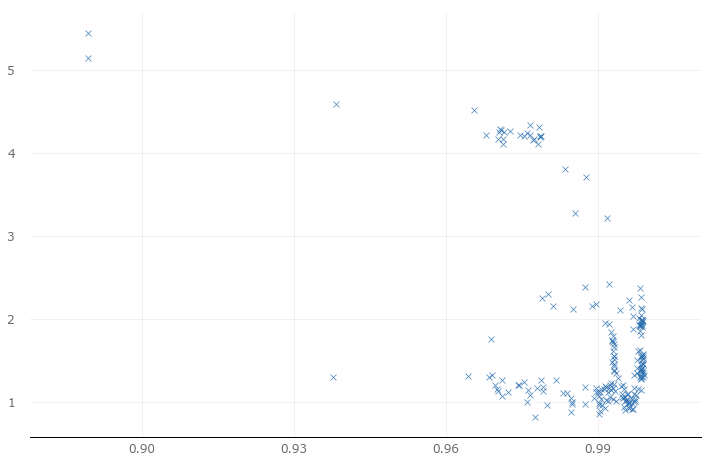

In [11]:
# a regression plot for two dimensions 
r.plot_regs('acc')

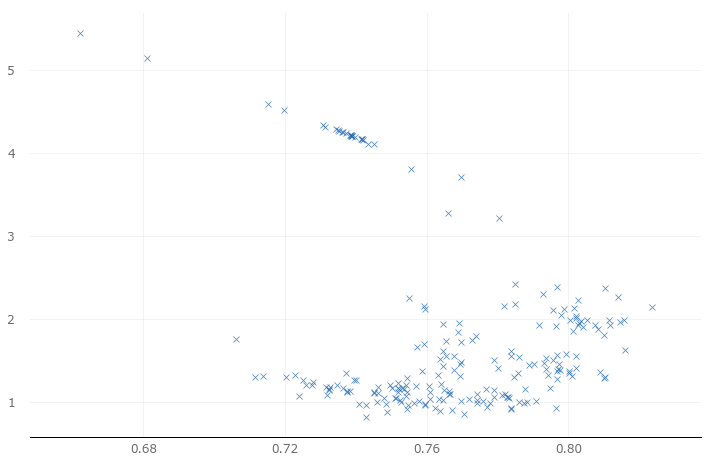

In [12]:
# a regression plot for two dimensions 
r.plot_regs('val_acc')

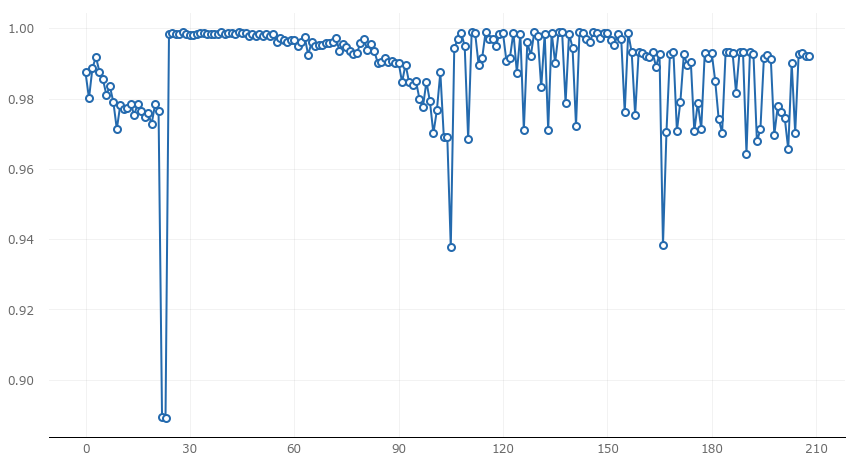

In [13]:
# line plot
r.plot_line('acc')

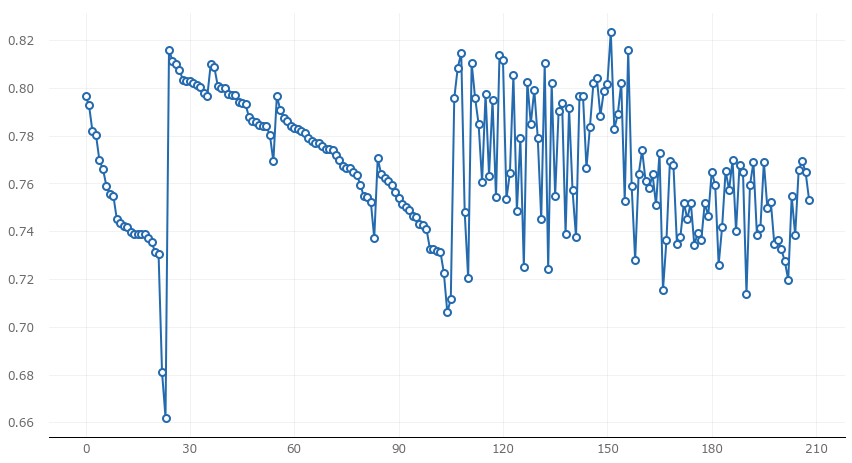

In [14]:
# line plot
r.plot_line('val_acc')

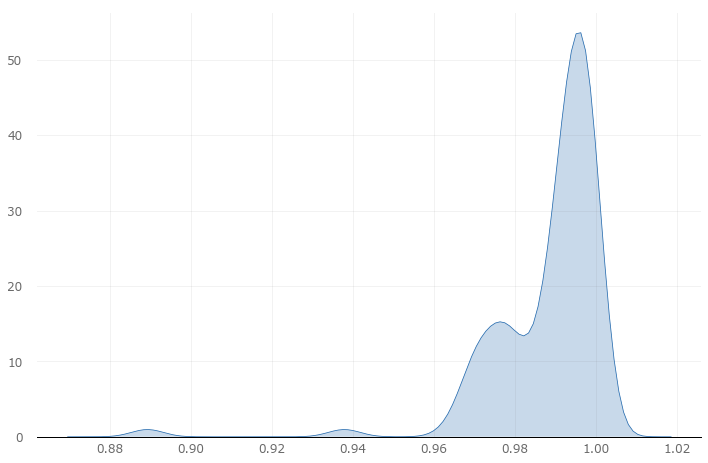

In [15]:
# up to two dimensional kernel density estimator
r.plot_kde('acc')

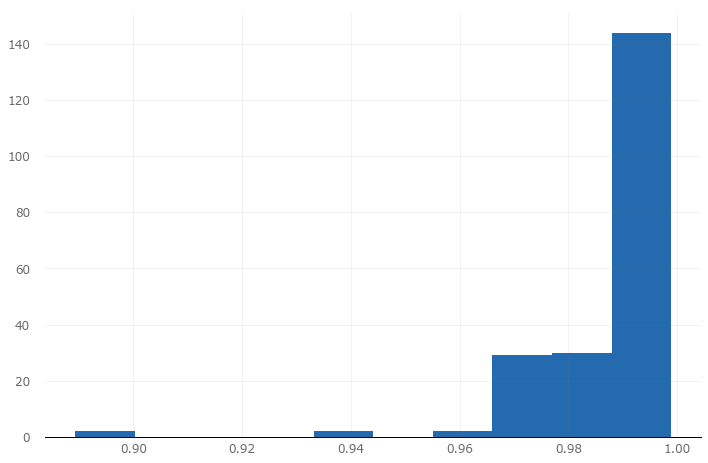

In [16]:

# a simple histogram
r.plot_hist('acc')

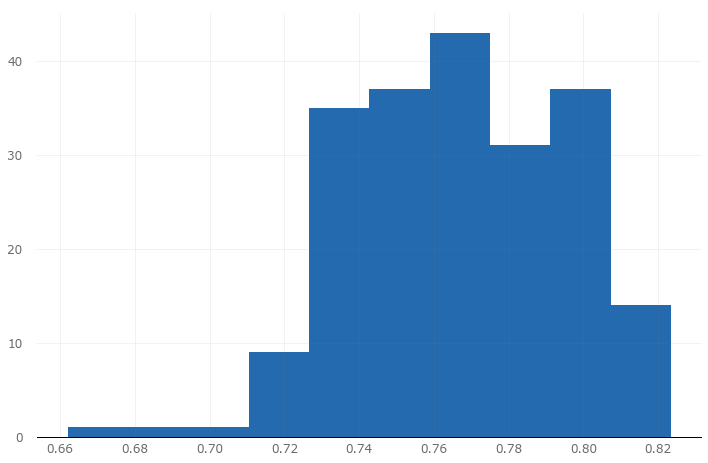

In [17]:

# a simple histogram
r.plot_hist('val_acc')

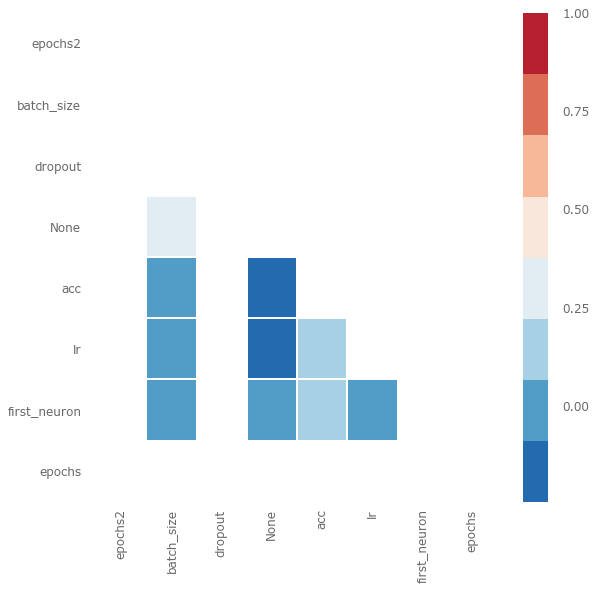

In [18]:
# heatmap correlation
r.plot_corr('acc')

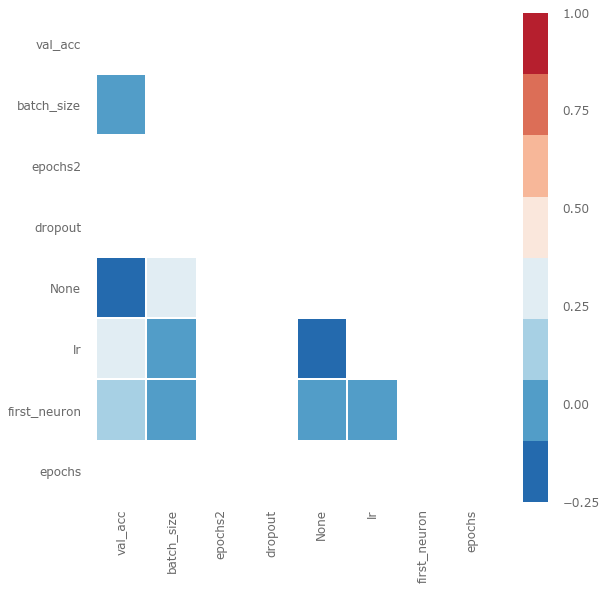

In [19]:
# heatmap correlation
r.plot_corr('val_acc')

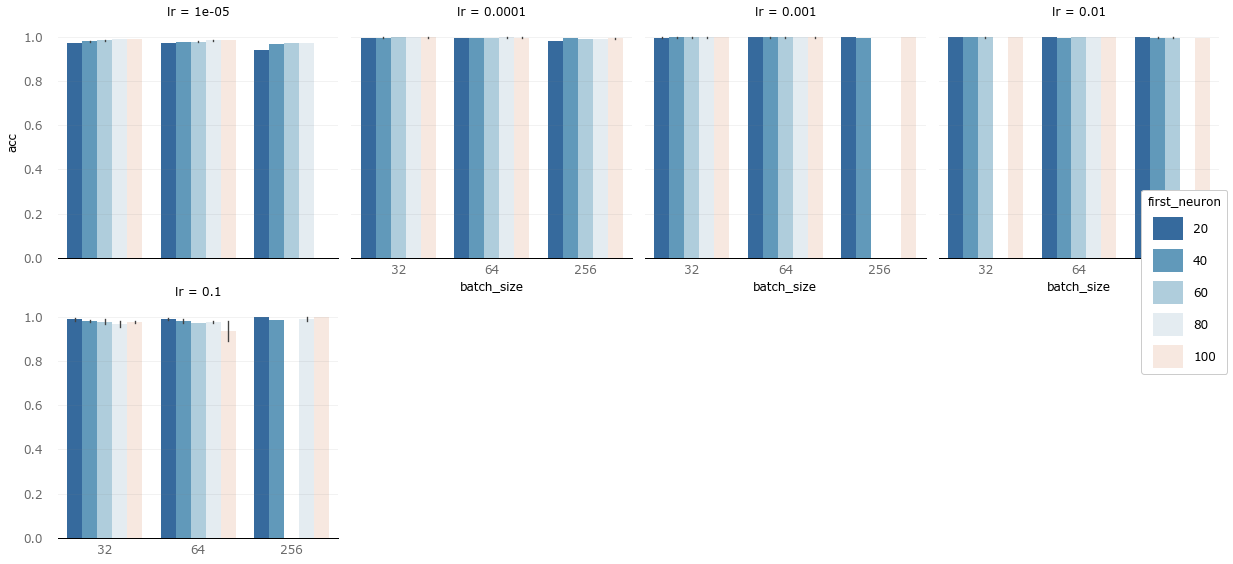

In [20]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'acc', 'first_neuron', 'lr')


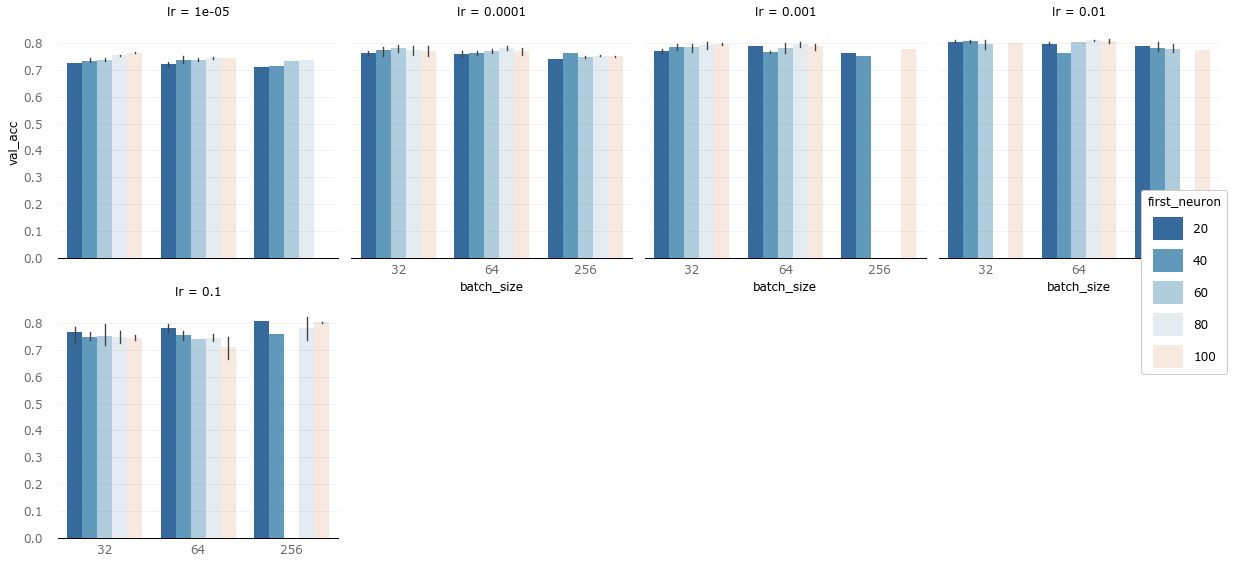

In [21]:
# a four dimensional bar grid
r.plot_bars('batch_size', 'val_acc', 'first_neuron', 'lr')

# Matrik Confusion

### Open Data

In [22]:
import numpy as np
def load_matrices(file_name):
    with open(file_name, 'rb') as f:
        A = np.load(f)
        B = np.load(f)
        C = np.load(f)
        D = np.load(f)
        E = np.load(f)
        F = np.load(f)
    return (A,B,C,D,E,F)

In [23]:
my_file = '../data_NSL/data.npy'
train, test, test2, y_train, y_test, y_test2 = load_matrices(my_file)

### Create Model

Karena pada best model fungsi aktivasi yang tersimpan sebagai 'lrelu', tidak dikenali pada saat load model maka model perludibuat secara manual. Bobot kemudian akan diload dari hasil terbaik. 


In [24]:
from keras.layers import Input,Dense
from keras.models import Model, Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.advanced_activations import PReLU
from keras.models import load_model
#actvation leakyrelu
LR= LeakyReLU(0.01)
LR.__name__ = 'lrelu'

In [25]:
# tcreate model Lrelu harus buat manual
input_dim = train.shape[1]
print(input_dim)

input_img = Input(shape=(input_dim,))
encoded = Dense(80, activation=LR, kernel_initializer='normal')(input_img)
z = Dense(input_dim, activation='sigmoid', kernel_initializer='normal')(encoded)
autoencoder = Model(input_img, z)
autoencoder.summary()



num_classes=5
#encoder is the model of the autoencoder slice in the middle 
encoder = Model(input_img, encoded)
# define new model encoder->Dense  10 neurons with soft max for classification 
out2 = Dense(num_classes, activation='softmax', kernel_initializer='normal')(encoder.output)
dnn = Model(encoder.input,out2)
dnn.summary()

122
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 122)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                9840      
_________________________________________________________________
dense_2 (Dense)              (None, 122)               9882      
Total params: 19,722
Trainable params: 19,722
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 122)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                9840   

In [26]:
# load model
filepath='./hasil/best1lrelu.hdf5'
#dnn=load_model(filepath)
#dnn.summary()

In [27]:
##loading dnn untuk data 
# load weights

dnn.load_weights(filepath)
# Compile model (required to make predictions)
dnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

result_train = dnn.evaluate(train,y_train)
for name, value in zip(dnn.metrics_names, result_train):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_train[1]*100))

Created model and loaded weights from file
125973/125973 [==============================] - 12s 94us/step
loss 0.01936345091244992
acc 0.9964516205853635
acc: 99.65%


In [28]:
##prediksi data Train

preds = dnn.predict(train)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(y_train, axis=1)

In [29]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
from sklearn.metrics import classification_report
outcomes = ['Normal','DoS','Probe' ,'R2L', 'U2R']
class_names=outcomes


target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names,labels=[1, 0, 2, 3,4], digits=5))
#print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

      Normal    0.99606   0.99743   0.99674     67343
         DoS    0.99941   0.99983   0.99962     45927
       Probe    0.99634   0.98173   0.98898     11656
         R2L    0.91547   0.95779   0.93615       995
         U2R    0.63077   0.78846   0.70085        52

    accuracy                        0.99645    125973
   macro avg    0.90761   0.94505   0.92447    125973
weighted avg    0.99652   0.99645   0.99647    125973



In [31]:
plt.rcParams.update(plt.rcParamsDefault)

Confusion matrix, without normalization
[[67170    26    39    85    23]
 [    4 45919     3     1     0]
 [  211     1 11443     1     0]
 [   41     0     0   953     1]
 [   10     0     0     1    41]]


<Figure size 640x480 with 0 Axes>

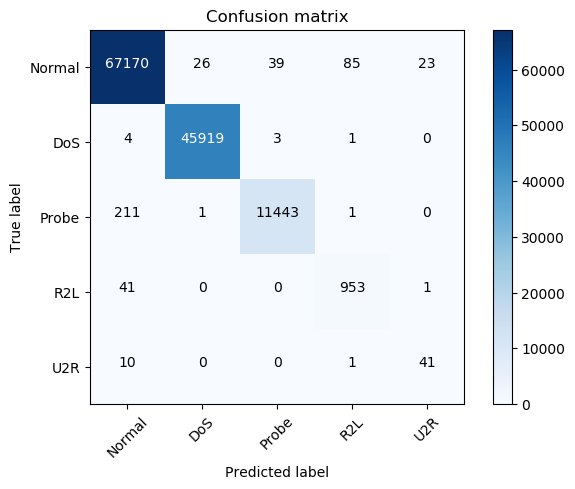

In [32]:
#outcomes = ['DoS', 'normal','Probe' ,'R2L', 'U2R']
class_names=outcomes

results = confusion_matrix(true_lbls, pred_lbls, labels=[1, 0, 2, 3,4])

# Plot non-normalized confusion matrix
plt.clf()
plt.figure()
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))

## Data Test

In [33]:
#Data Test
result_test = dnn.evaluate(test,y_test)
for name, value in zip(dnn.metrics_names, result_test):
    print(name, value)
    
print("%s: %.2f%%" % (dnn.metrics_names[1], result_test[1]*100))

22544/22544 [==============================] - 2s 82us/step
loss 2.6486482253897012
acc 0.823500709723208
acc: 82.35%


In [34]:
##prediksi data Train
#y_test=y_test.to_numpy()

preds = dnn.predict(test)
pred_lbls = np.argmax(preds, axis=1)
true_lbls = np.argmax(y_test, axis=1)

              precision    recall  f1-score   support

      Normal    0.74030   0.96900   0.83935      9711
         DoS    0.95976   0.80263   0.87419      7458
       Probe    0.88036   0.83891   0.85914      2421
         R2L    0.88792   0.40559   0.55683      2754
         U2R    0.67742   0.10500   0.18182       200

    accuracy                        0.82350     22544
   macro avg    0.82915   0.62423   0.66227     22544
weighted avg    0.84542   0.82350   0.81266     22544

Confusion matrix, without normalization
[[9410   89  204    4    4]
 [1299 5986   55  118    0]
 [ 215  162 2031   13    0]
 [1626    0    5 1117    6]
 [ 161    0   12    6   21]]


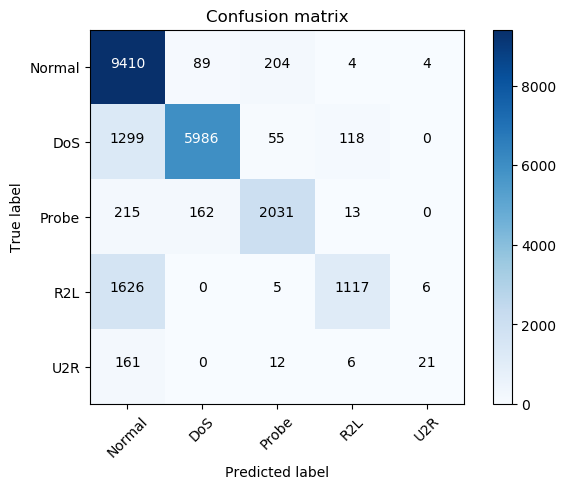

In [35]:
target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(true_lbls, pred_lbls, target_names=class_names,labels=[1, 0, 2, 3,4], digits=5))


results = confusion_matrix(true_lbls, pred_lbls, labels=[1, 0, 2, 3,4])

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(results, classes=class_names,
                      title='Confusion matrix')

#print(classification_report(y_test, deepprediction, target_names=class_names, digits=5))